### ガラスの分類

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [28]:
# データ準備
train = pd.read_csv('train.tsv', index_col=0, sep='\t')
train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51720,13.38,3.50,1.15,72.85,0.50,8.43,0.0,0.00,1
1,1.51631,13.34,3.57,1.57,72.87,0.61,7.89,0.0,0.00,2
3,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.0,0.00,5
6,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00,1
9,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1


In [29]:
train.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [46]:
#決定木
y_col = 'Type'
X = train.drop(y_col, axis=1)
y = train[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = tree.DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [47]:
y_pred = model.predict(X_test)

In [48]:
y_pred

array([2, 2, 2, 7, 2, 1, 2, 2, 3, 2, 2, 2, 3, 2, 1, 2, 2, 1, 2, 2, 1, 1,
       5, 7, 1, 3, 2, 7, 2, 7, 1, 3, 1])

In [49]:
model.score(X_test, y_test)

0.5454545454545454

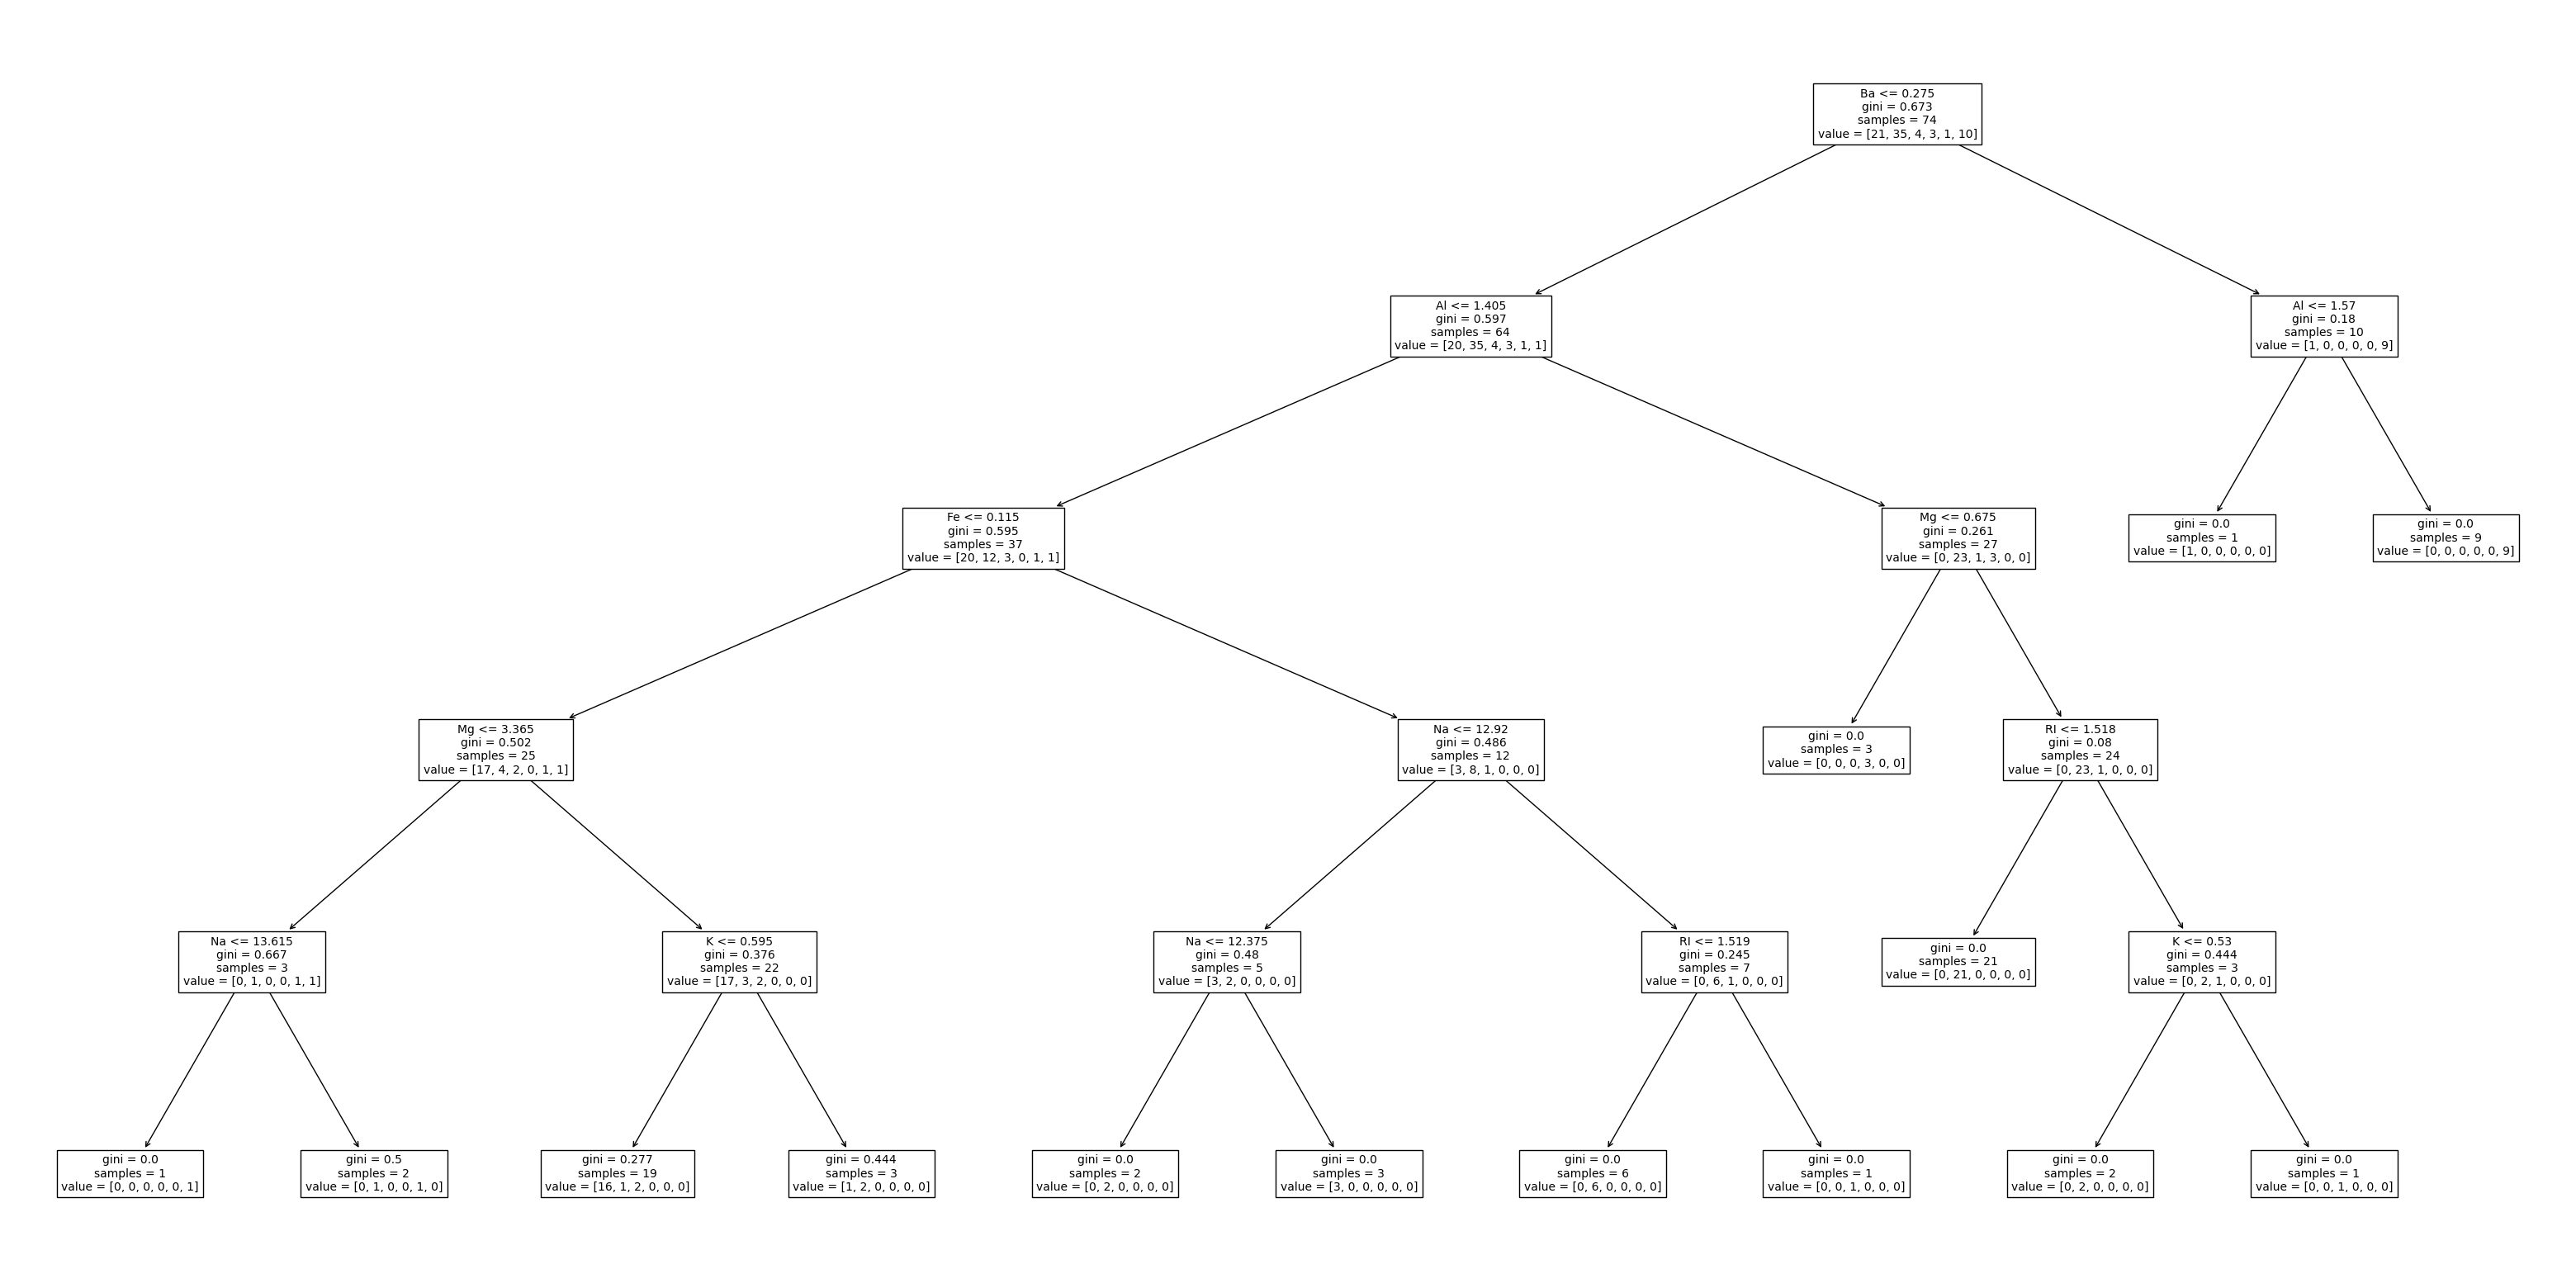

In [52]:
# 決定木の描画
plt.figure(figsize=(40,20))
_ = tree.plot_tree(model, fontsize=10, feature_names=list(model.feature_names_in_))

In [54]:
print(tree.export_text(model, feature_names=model.feature_names_in_))

|--- Ba <= 0.28
|   |--- Al <= 1.40
|   |   |--- Fe <= 0.11
|   |   |   |--- Mg <= 3.37
|   |   |   |   |--- Na <= 13.61
|   |   |   |   |   |--- class: 7
|   |   |   |   |--- Na >  13.61
|   |   |   |   |   |--- class: 2
|   |   |   |--- Mg >  3.37
|   |   |   |   |--- K <= 0.59
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- K >  0.59
|   |   |   |   |   |--- class: 2
|   |   |--- Fe >  0.11
|   |   |   |--- Na <= 12.92
|   |   |   |   |--- Na <= 12.38
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- Na >  12.38
|   |   |   |   |   |--- class: 1
|   |   |   |--- Na >  12.92
|   |   |   |   |--- RI <= 1.52
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- RI >  1.52
|   |   |   |   |   |--- class: 3
|   |--- Al >  1.40
|   |   |--- Mg <= 0.68
|   |   |   |--- class: 5
|   |   |--- Mg >  0.68
|   |   |   |--- RI <= 1.52
|   |   |   |   |--- class: 2
|   |   |   |--- RI >  1.52
|   |   |   |   |--- K <= 0.53
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- K >  0

In [55]:
# 各特徴量の重要度
model.feature_importances_

array([0.05446235, 0.12134098, 0.17558944, 0.25956781, 0.        ,
       0.07133829, 0.        , 0.23220935, 0.08549178])

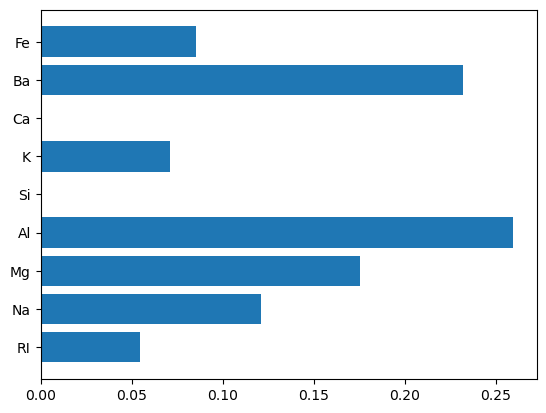

In [56]:
plt.barh(model.feature_names_in_, model.feature_importances_)
plt.show()